In [1]:
!gdown "1JID0Wzy_hs_nHZBDf88Ug6ahNZ_m6N53"

Downloading...
From: https://drive.google.com/uc?id=1JID0Wzy_hs_nHZBDf88Ug6ahNZ_m6N53
To: /content/yolov5.zip
100% 214M/214M [00:02<00:00, 79.0MB/s]


In [2]:
!unzip "/content/yolov5.zip"

Archive:  /content/yolov5.zip
   creating: yolov5/
  inflating: __MACOSX/._yolov5       
  inflating: yolov5/yolo5_efficientnet.ipynb  
  inflating: __MACOSX/yolov5/._yolo5_efficientnet.ipynb  
  inflating: yolov5/.DS_Store        
  inflating: __MACOSX/yolov5/._.DS_Store  
   creating: yolov5/classify/
  inflating: __MACOSX/yolov5/._classify  
  inflating: yolov5/LICENSE          
  inflating: __MACOSX/yolov5/._LICENSE  
  inflating: yolov5/requirements.txt  
  inflating: __MACOSX/yolov5/._requirements.txt  
  inflating: yolov5/.pre-commit-config.yaml  
  inflating: __MACOSX/yolov5/._.pre-commit-config.yaml  
  inflating: yolov5/CITATION.cff     
  inflating: __MACOSX/yolov5/._CITATION.cff  
  inflating: yolov5/val.py           
  inflating: __MACOSX/yolov5/._val.py  
  inflating: yolov5/train.txt        
  inflating: __MACOSX/yolov5/._train.txt  
   creating: yolov5/segment/
  inflating: __MACOSX/yolov5/._segment  
  inflating: yolov5/my_data.yaml     
  inflating: __MACOSX/yolov5/._

In [3]:
%cd yolov5

/content/yolov5


In [4]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 617.5/617.5 kB 6.5 MB/s eta 0:00:00


In [5]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolov8s.pt")  # load a pretrained model (recommended for training)

# Use the model
model.train(data="/content/yolov5/my_data.yaml", epochs=999)  # train the model

100%|██████████| 21.5M/21.5M [00:00<00:00, 143MB/s] 
Ultralytics YOLOv8.0.153 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/yolov5/my_data.yaml, epochs=999, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscri

In [7]:
metrics = model.val(data='/content/yolov5/my_data.yaml', conf=0.1)  # evaluate model performance on the validation set

Ultralytics YOLOv8.0.153 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
val: Scanning image... 74 images, 0 backgrounds, 4 corrupt: 100%|██████████| 74/74 [00:00<00:00, 1264.38it/s]
val: WARNING ⚠️ image/s3_120.jpg: ignoring corrupt image/label: negative label values [     -0.038]
val: WARNING ⚠️ image/s3_167.jpg: ignoring corrupt image/label: negative label values [     -0.005]
val: WARNING ⚠️ image/s3_271.jpg: ignoring corrupt image/label: negative label values [     -0.001]
val: WARNING ⚠️ image/s4_46.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [      1.015]
val: New cache created: image.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:09<00:00,  1.82s/it]
                   all         70        897     0.0157    0.00593     0.0113    0.00639
            Biscuits/3         70          5          0          0          0          0
            Biscuits/5         

In [ ]:
# results = model("https://ultralytics.com/images/bus.jpg")  # predict on an image
path = model.export(format="onnx")  # export the model to ONNX format

Ultralytics YOLOv8.0.146 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU (Intel Xeon 2.00GHz)

PyTorch: starting from 'runs/detect/train3/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 217, 8400) (21.6 MB)

ONNX: starting export with onnx 1.14.0 opset 17...
ONNX: export success ✅ 1.2s, saved as 'runs/detect/train3/weights/best.onnx' (43.0 MB)

Export complete (3.1s)
Results saved to /content/yolov5/runs/detect/train3/weights
Predict:         yolo predict task=detect model=runs/detect/train3/weights/best.onnx imgsz=640 
Validate:        yolo val task=detect model=runs/detect/train3/weights/best.onnx imgsz=640 data=None 
Visualize:       https://netron.app


============= Diagnostic Run torch.onnx.export version 2.0.1+cu118 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from distutils.dir_util import copy_tree


In [ ]:
copy_tree("/content/yolov5/runs/detect/train3/","/content/drive/MyDrive/train3")

['/content/drive/MyDrive/train3/val_batch2_labels.jpg',
 '/content/drive/MyDrive/train3/val_batch2_pred.jpg',
 '/content/drive/MyDrive/train3/args.yaml',
 '/content/drive/MyDrive/train3/weights/best.pt',
 '/content/drive/MyDrive/train3/weights/last.pt',
 '/content/drive/MyDrive/train3/weights/best.onnx',
 '/content/drive/MyDrive/train3/results.png',
 '/content/drive/MyDrive/train3/results.csv',
 '/content/drive/MyDrive/train3/R_curve.png',
 '/content/drive/MyDrive/train3/train_batch2.jpg',
 '/content/drive/MyDrive/train3/labels_correlogram.jpg',
 '/content/drive/MyDrive/train3/val_batch1_labels.jpg',
 '/content/drive/MyDrive/train3/val_batch0_labels.jpg',
 '/content/drive/MyDrive/train3/P_curve.png',
 '/content/drive/MyDrive/train3/val_batch1_pred.jpg',
 '/content/drive/MyDrive/train3/labels.jpg',
 '/content/drive/MyDrive/train3/train_batch0.jpg',
 '/content/drive/MyDrive/train3/val_batch0_pred.jpg',
 '/content/drive/MyDrive/train3/confusion_matrix.png',
 '/content/drive/MyDrive/train3


0: 640x480 1 Cereals/117, 1 Tea/43, 118.0ms
Speed: 4.4ms preprocess, 118.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict


[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
keys: ['boxes']
masks: None
names: {0: 'Biscuits/3', 1: 'Biscuits/5', 2: 'Biscuits/6', 3: 'Biscuits/10', 4: 'Biscuits/12', 5: 'Biscuits/13', 6: 'Biscuits/14', 7: 'Biscuits/17', 8: 'Biscuits/18', 9: 'Biscuits/19', 10: 'Biscuits/24', 11: 'Biscuits/28', 12: 'Biscuits/30', 13: 'Biscuits/31', 14: 'Biscuits/32', 15: 'Biscuits/33', 16: 'Biscuits/34', 17: 'Biscuits/36', 18: 'Biscuits/37', 19: 'Biscuits/38', 20: 'Biscuits/39', 21: 'Biscuits/40', 22: 'Biscuits/44', 23: 'Biscuits/45', 24: 'Biscuits/47', 25: 'Biscuits/52', 26: 'Biscuits/55', 27: 'Biscuits/74', 28: 'Biscuits/76', 29: 'Biscuits/80', 30: 'Biscuits/91', 31: 'Biscuits/93', 32: 'Biscuits/96', 33: 'Biscuits/97', 34: 'Biscuits/103', 35: 'Biscuits/106', 36: 'Biscuits/108', 37: 'Biscuits/109', 38: 'Biscuits/113', 39: 'Biscuits/114', 40: 'Biscuits/115', 41: 'Biscuits/118', 42: 'Biscuits/119', 43: 'Cereals/46', 44: 'Cere

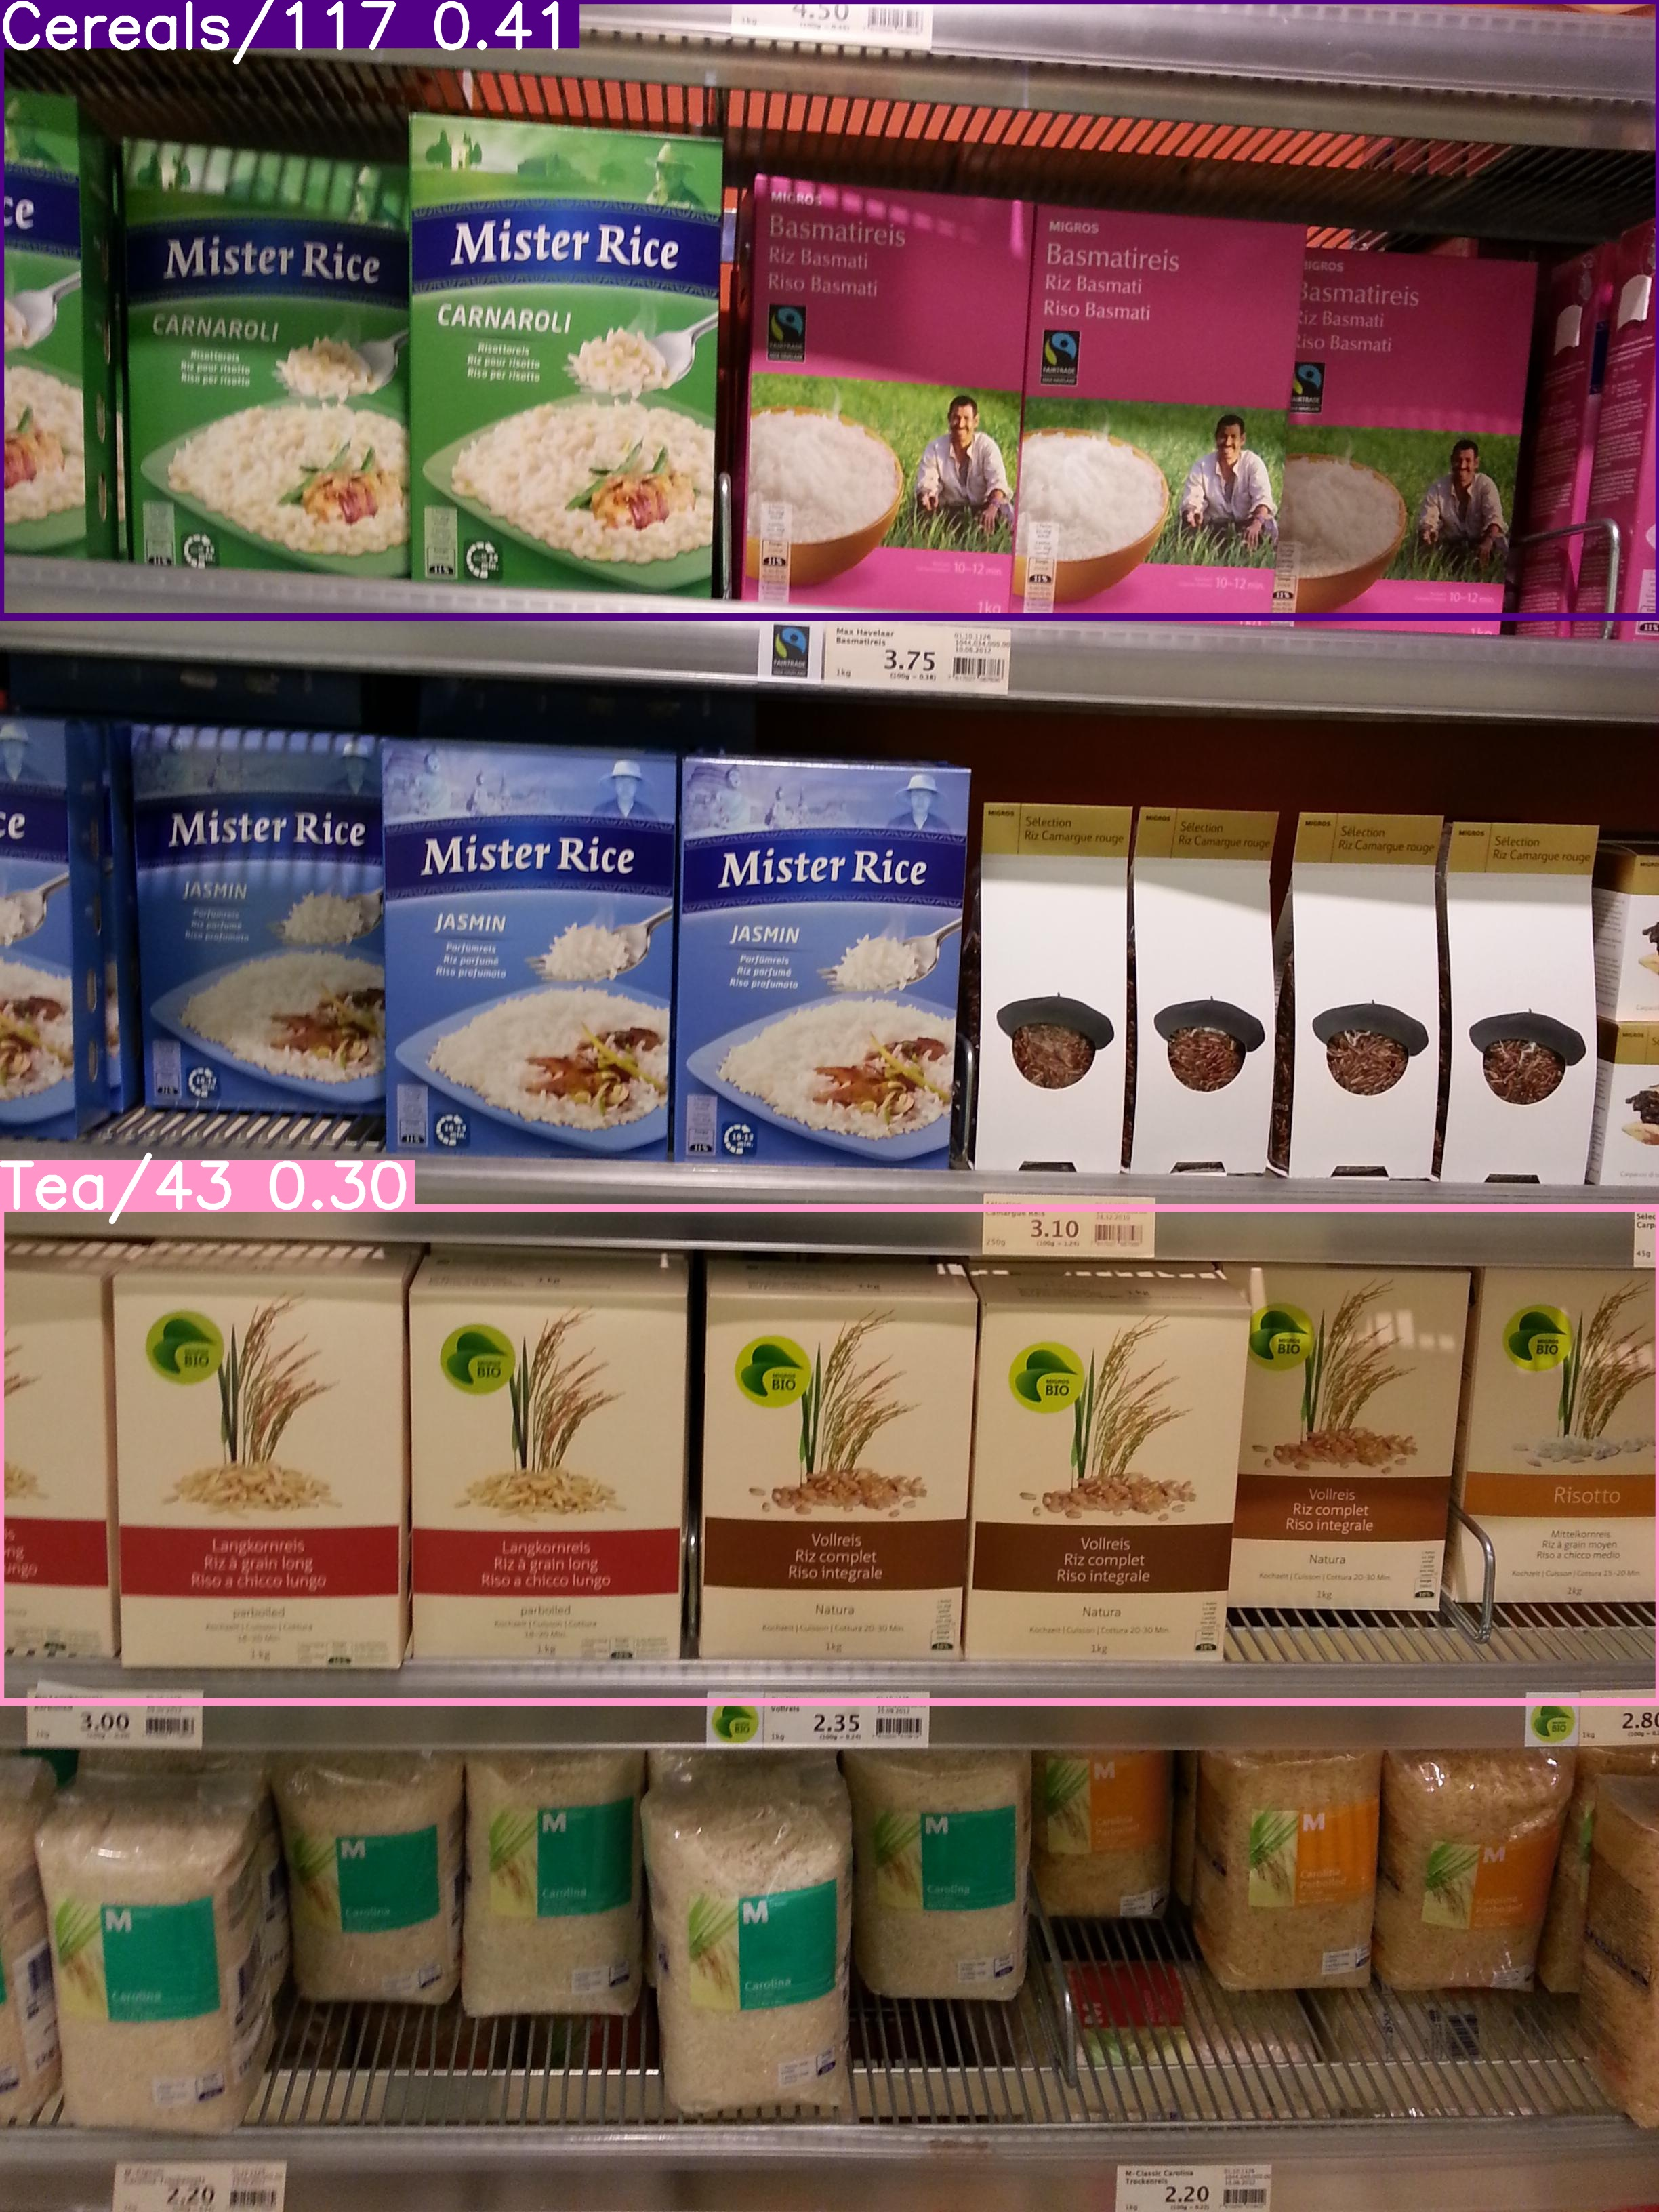

In [10]:
from ultralytics import YOLO
from PIL import Image
import cv2

# from PIL
im1 = Image.open("/content/yolov5/image/s1_15.jpg")
results = model.predict(source=im1, save=True)  # save plotted images
print(results)
display(Image.open('runs/detect/predict/s1_15.jpg'))